<a href="https://colab.research.google.com/github/yuu19/machine-learning-100-/blob/master/machinelearning100_chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
#LSMにより切片と傾きを求める
def min_sq(x, y):
  x_bar, y_bar = np.mean(x), np.mean(y)
  beta_1 = np.dot(x-x_bar, y-y_bar)/np.linalg.norm(x-x_bar)**2
  beta_0 = y_bar - beta_1*x_bar
  return [beta_1, beta_0]

N = 100
a = np.random.normal(loc=2, scale=1, size=N) #平均2,標準偏差1の疑似乱数をN個発生させる。
b = np.random.randn(1)
x = np.random.randn(N)
y = a*x+b+np.random.randn(N)
a1, b1 = min_sq(x, y)
xx = x - np.mean(x); yy = y - np.mean(y)

a2, b2 = min_sq(xx, yy)
#ほぼほぼ切片が0になっていることに注意
print(a2, b2)
#傾きは中心化後も不変
print(a1, a2)


1.9546441626693238 3.452817715951241e-16
1.9546441626693238 1.9546441626693238


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


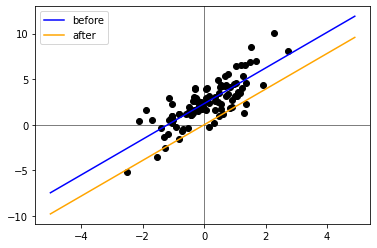

In [ ]:
import matplotlib.pyplot as plt
x_seq = np.arange(-5, 5, 0.1)
y_pre = x_seq*a1+b1
yy_pre = x_seq*a2+b2

plt.scatter(x, y, c="black")
#y=0 水平線
plt.axhline(y=0, c="black", linewidth=0.5)
#x=0 垂直線
plt.axvline(x=0, c="black", linewidth=0.5)
plt.plot(x_seq, y_pre, c="blue", label="before")
plt.plot(x_seq, yy_pre, c="orange", label="after")
plt.legend(loc="upper_left")

In [ ]:
n = 100; p = 2
beta = np.array([1, 2, 3])
x = np.random.randn(n, 2)
#print(x)
y = beta[0]+beta[1]*x[:, 0] + beta[2]*x[:, 1] + np.random.randn(n)
print(y)
X = np.insert(x, 0, 1, axis=1)
beta_est = np.linalg.inv(X.T@X)@X.T@y
print(beta_est)


[ 2.38087109  4.45019263 -6.6530402   4.99890617  4.30178464  2.99327808
 -2.8471809   5.22016049  4.06767776  2.84072843  5.07459788  4.61389217
  4.23559722 -0.24779337 -2.40924907  3.67135808  3.09860221  2.35279313
 -2.03100128  3.86053919 -4.02248339  3.38869426 -2.87539587  0.08310391
 -1.43557709  0.39024942 -1.43571756  9.16211232 -4.56710559  5.46936708
 -0.75530008  3.11519226 -5.1175241   3.33558875 -0.88691437 -3.41020344
 -5.71959875  1.15496864  1.25015596 -3.13606639 -0.10300776  1.86400141
 -5.06448863 -2.94169185  8.18594194  2.05078595  7.03276824  4.25312828
  1.68283659 -1.14172817  1.96021539 -4.08864364 -1.52200428 -1.1153463
  4.71909386  2.62916779 -3.08305857 -0.21625665 -0.26610381 -1.59570814
  0.14294259 -0.57902724  4.09232666  0.17455083  0.01916994  7.4117288
  8.96533753 -0.18591025 10.09713405  2.36553116  3.60491118  0.74148118
 -0.8766529   6.8379479  -1.67994973 -2.83382531  4.97620933  4.89931958
  0.01725315 -2.49611656 -5.00564783  6.38726386 -4.3

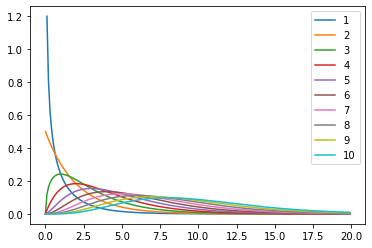

In [ ]:

from scipy.stats import norm, chi2, t

x = np.arange(0, 20, 0.1)
for i in range(1, 11):
  plt.plot(x, chi2.pdf(x, df=i), label='{}'.format(i))

plt.legend(loc='upper right')

Text(0.5, 1.0, 'how t distribution changes')

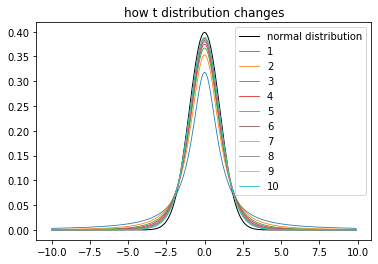

In [ ]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, norm.pdf(x, 0, 1), label="normal distribution", c="black", linewidth=1)
for i in range(1, 11):
  plt.plot(x, t.pdf(x, i), label='{}'.format(i), linewidth=0.8)

plt.legend(loc="upper right")
plt.title("how t distribution changes")

Text(0, 0.5, 'beta_1')

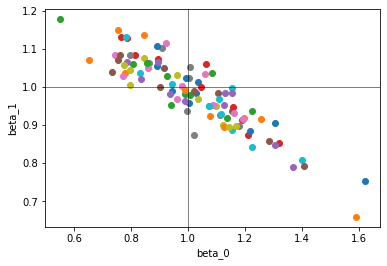

In [ ]:
N = 100; p = 1

iter_num = 100

for i in range(iter_num):
  x = np.random.randn(N) + 2
  e = np.random.randn(N)
  y = x + 1 + e
  b_1, b_0 = min_sq(x, y)
  plt.scatter(b_0, b_1)

plt.axhline(y=1.0, c="black", linewidth=0.5)
plt.axvline(x=1.0, c="black", linewidth=0.5)
plt.xlabel('beta_0')
plt.ylabel('beta_1')

In [ ]:

#単回帰(p=1)の場合(例23を参照)
N = 100
x = np.random.rand(N); y = np.random.rand(N)
beta_1, beta_0 = min_sq(x, y)
RSS = np.linalg.norm(y-beta_0-beta_1*x)
RSE = np.sqrt(RSS/(N-2))
B_0 = (x.T@x/N)/np.linalg.norm(x-np.mean(x))**2
B_1 = 1/np.linalg.norm(x-np.mean(x))**2
se_0 = RSE*np.sqrt(B_0)
se_1 = RSE*np.sqrt(B_1)
t_0 = beta_0 / se_0 
t_1 = beta_1 / se_1
#p値を求める
p_0 = 2*(1-t.cdf(np.abs(t_0), N-2))
p_1 = 2*(1-t.cdf(np.abs(t_1), N-2))


In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
#ベクトルxとyをN*1のベクトルに変形
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
reg.fit(x, y)
reg.coef_, reg.intercept_ #回帰係数と切片

(array([[-0.1339111]]), array([0.58017617]))

In [ ]:
import statsmodels.api as sm
X = np.insert(x, 0, 1, axis=1)
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.067
Date:                Sun, 20 Feb 2022   Prob (F-statistic):              0.154
Time:                        11:25:07   Log-Likelihood:                -14.609
No. Observations:                 100   AIC:                             33.22
Df Residuals:                      98   BIC:                             38.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5802      0.058     10.037      0.0

Text(0, 0.5, 'density function')

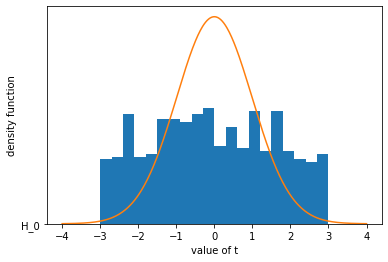

In [ ]:
#帰無仮説の下でデータを発生させる

N = 100; r = 1000
T = []

for i in range(r):
  x = np.random.randn(N); y = np.random.randn(N)
  beta_1, beta_0 = min_sq(x, y)
  pre_y = beta_0 + beta_1*x #yの推定値
  RSS = np.linalg.norm(y-beta_0-beta_1*x)
  RSE = np.sqrt(RSS/(N-2))
  B_0 = (x.T@x/N)/np.linalg.norm(x-np.mean(x))**2
  B_1 = 1/np.linalg.norm(x-np.mean(x))**2
  se_1 = RSE*np.sqrt(B_1)
  T.append(beta_1/se_1)

plt.hist(T, bins=20, range=(-3, 3), density=True)
x = np.linspace(-4, 4, 400)
plt.plot(x, t.pdf(x, df=N-1-1))
plt.plot("H_0")
plt.xlabel('value of t')
plt.ylabel('density function')

In [ ]:
#決定関数を求める関数

def R2(x, y):
  n = x.shape[0]
  xx = np.insert(x, 0, 1, axis=1)
  beta = np.linalg.inv(xx.T@xx)@xx.T@y #係数の推定値
  y_hat = xx@beta #yの推定値
  y_bar = np.mean(y)
  RSS = np.linalg.norm(y-y_hat)**2
  TSS = np.linalg.norm(y-y_bar)**2
  return 1 - RSS/TSS

N = 100; m = 2
x = np.random.randn(N, m)
y = np.random.randn(N)
R2(x, y)

0.007714995686496695

In [ ]:
#1変量の場合、決定係数は相関係数の2乗となる

x = np.random.randn(N, 1)
y = np.random.randn(N)
R2(x, y)
print(R2(x, y))
xx = x.reshape(N)
np.corrcoef(xx, y)[0,1]**2



0.003211683729892778


0.0032116837298926115

In [ ]:
#VIFの計算(定義についてはhttps://ja.wikipedia.org/wiki/%E5%88%86%E6%95%A3%E6%8B%A1%E5%A4%A7%E4%BF%82%E6%95%B0を参照)
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data


def VIF(x):
  p = x.shape[1]
  values = []
  for j in range(p):
    S = list(set(range(p))-{j})
    values.append(1/(1-R2(x[:,S], x[:, j])))
  return values
VIF(x)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

[1.792191547433241,
 2.29875817874944,
 3.9915964183460297,
 1.073995327553789,
 4.393719847577495,
 1.9337444357832565,
 3.1008255128153372,
 3.9559449063727263,
 7.484496335274466,
 9.00855394759707,
 1.7990840492488995,
 1.3485210764063762,
 2.9414910780919357]